**1. Rayleigh Flow: Derive a closed-form analytical expression for the Mach number in terms of the ratio of the total temperature to its diabatic sonic counterpart (i.e., T0/T0∗). Clearly identify the subsonic and supersonic solutions, with proper justification. Also, determine the ranges of T0/T0∗ in which your equations are valid.**

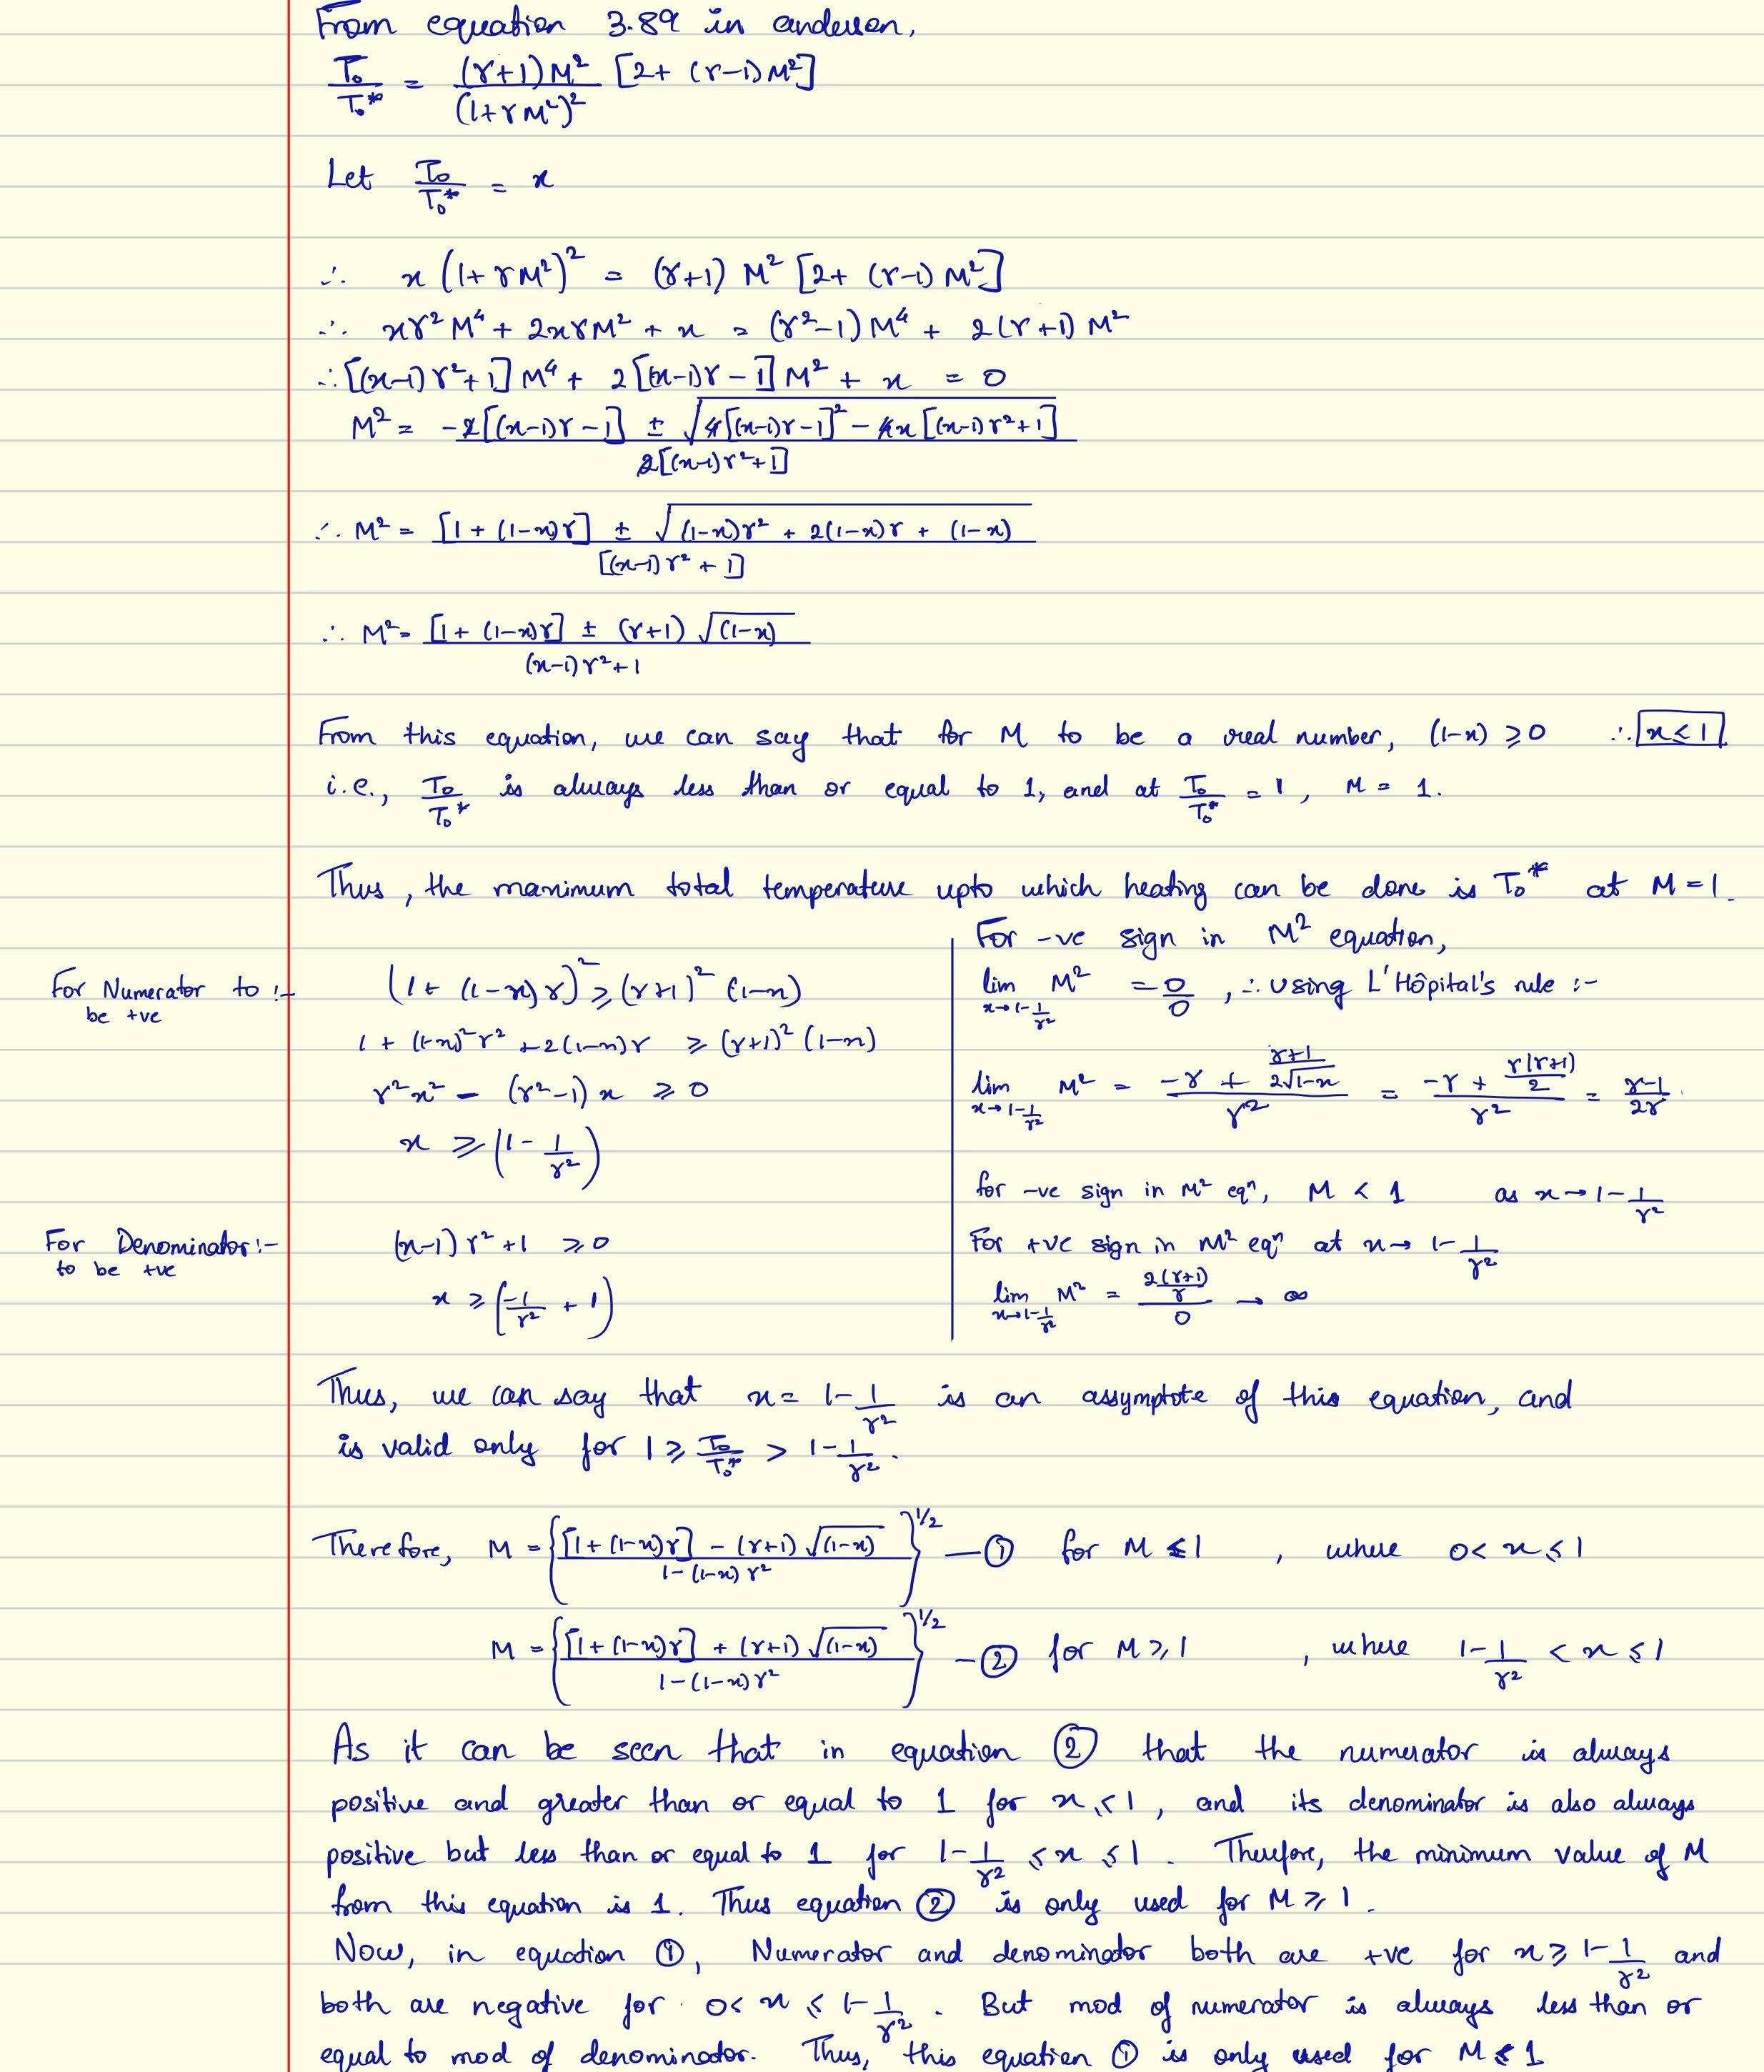

**2.Rayleigh Flow: Write a code (and run it) to reproduce the graph flashed in class showing the ratios of thermodynamic properties to their respective diabatic sonic counterparts (e.g., p/p∗, T/T∗,T0/T0∗, etc.) versus Mach number. Also reproduce the T −s diagram flashed in class (with appropriate normalization).**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gamma = 1.4 # Specific heat ratio
R = 287 # Gas cnst.
Cp = gamma * R / (gamma -1)
# Mach number range
M = np.arange(0.4, 4, 0.01)

### Ratio Functions in terms of Mach Number

In [ ]:
# Pressure ratio function for Rayleigh flow
def P_ratio(M):
    return (1 + gamma) / (1 + gamma * M**2)

In [ ]:
# Density ratio function for Rayleigh flow
def rho_ratio(M):
    return (1/M**2)*(1 + gamma * M**2) / (1 + gamma)

In [ ]:
# Temperature ratio function for Rayleigh flow
def T_ratio(M):
    return (M**2)*((1 + gamma) / (1 + gamma * M**2))**2

In [ ]:
# Total temperature ratio function for Rayleigh flow
def T_0_ratio(M):
    return ((gamma +1) * M**2 / ((1 + gamma * M**2))**2) * (2 + (gamma -1) * M**2)

In [ ]:
# Total pressure ratio function for Rayleigh flow
def P_0_ratio(M):
    return ((1 + gamma) / (1 + gamma * M**2))* ((2 + (gamma -1)* M**2)/(gamma +1))**(gamma/(gamma-1))

Equation 3.85 to 3.89 from Mordern compressible flow by J. D. Anderson

### Plotting

Text(0.5, 1.0, 'Rayleigh Flow Ratios')

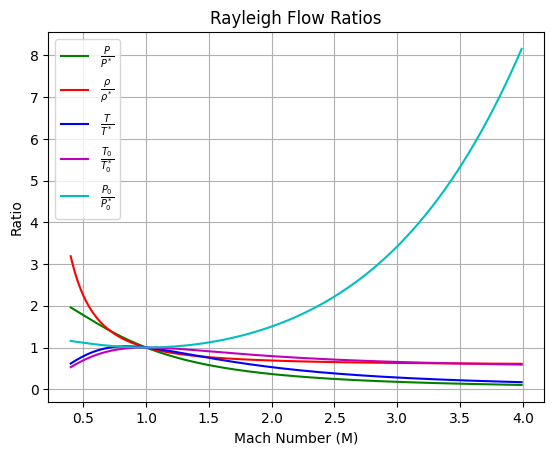

In [ ]:
plt.plot(M, P_ratio(M), 'g', label=r'$\frac{P}{P^*}$')
plt.plot(M, rho_ratio(M), 'r', label=r'$\frac{\rho}{\rho^*}$')
plt.plot(M, T_ratio(M), 'b', label=r'$\frac{T}{T^*}$')
plt.plot(M, T_0_ratio(M), 'm', label=r'$\frac{T_0}{T_0^*}$')
plt.plot(M, P_0_ratio(M), 'c', label=r'$\frac{P_0}{P_0^*}$')
plt.legend()
plt.grid()
plt.xlabel('Mach Number (M)')
plt.ylabel('Ratio')
plt.title('Rayleigh Flow Ratios')

In [ ]:
def del_S(M):
    return Cp * np.log(T_ratio(M)) - R * np.log(P_ratio(M))

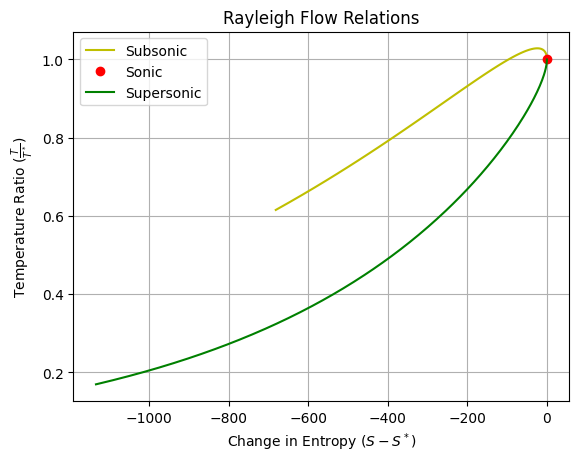

In [ ]:
plt.plot(del_S(M[M<1]), T_ratio(M[M<1]), 'y', label=r'Subsonic')
plt.plot(del_S(1), T_ratio(1), 'ro', label=r'Sonic')
plt.plot(del_S(M[M>1]), T_ratio(M[M>1]), 'g', label=r'Supersonic')
plt.legend()
plt.grid()
plt.xlabel('Change in Entropy ($ S-S^* $)')
plt.ylabel(r'Temperature Ratio ($\frac{T}{T^*}$)')
plt.title('Rayleigh Flow Relations')
plt.show()

 **3.Rayleigh Flow: Code up your solution of the first question and reuse parts from the second solution to design and implement a function with appropriate arguments and outputs, such that you can solve typical Rayleigh flow problems. Make this function in such a way that you can use it to solve examples 3.13 and 3.14 of Anderson’s textbook (2003 edition) (or any two examples of your
 choice that exercise both the subsonic and supersonic parts of your code). Hence validate your code, with the given solutions to these example problems.**


### The Function to calculate $M_{2}$ from $\frac{T_0}{T_0^*}$ and $M_{1}$

In [ ]:
def M_calculator(k,M1, gamma= gamma): # k = T0/T0_star
    if M1 < 1:  # Subsonic Case
        return (( 1 + (1-k) * gamma - (gamma+1) * (1-k) ** 0.5 ) / (( k - 1 ) * gamma ** 2 + 1))**0.5

    if M1 >1:   # Supersonic Case
        return (( 1 + (1-k) * gamma + (gamma+1) * (1-k) ** 0.5 ) / (( k - 1 ) * gamma ** 2 + 1))**0.5

### The Function to calculate station 2 properties from station 1 properties

In [ ]:
def rayleigh_solver(M1, T1, P1, q):  # Units:- T1 (K), P1 (Pa), q (J /kg)
    rho1 = P1 / (R * T1)
    T_0_1 = T1 * (1 + ((gamma - 1) / 2) * M1 ** 2)
    P_0_1 = (T_0_1 / T1) ** (gamma / (gamma - 1)) * P1
    T_0_star = T_0_1 / T_0_ratio(M1)
    T_0_2 = T_0_1 + q / Cp
    M2 = M_calculator(T_0_2 / T_0_star, M1)
    P2 = (P_ratio(M2) / P_ratio(M1)) * P1
    T2 = (T_ratio(M2) / T_ratio(M1)) * T1
    rho2 = (rho_ratio(M2) / rho_ratio(M1)) * rho1
    P_0_2 = (P_0_ratio(M2) / P_0_ratio(M1)) * P_0_1
    return M2, P2, T2, rho2, T_0_2, P_0_2

## Example 3.13

In [ ]:
M2, P2, T2, rho2, T_0_2, P_0_2 = rayleigh_solver(M1=0.2,T1=273,P1 =1*101325, q =1e6)
print(f"Results:")
print(f"Mach number at station 2 (M2): {M2:.2f}")
print(f"Pressure at station 2 (P2): {P2/101325:.3f} atm")
print(f"Temperature at station 2 (T2): {T2:.3f} K")
print(f"Density at station 2 (rho2): {rho2:.3f} kg/m^3")
print(f"Total temperature at station 2 (T_0_2): {T_0_2:.3f} K")
print(f"Total pressure at station 2 (P_0_2): {P_0_2/101325:.3f} atm")

Results:
Mach number at station 2 (M2): 0.58
Pressure at station 2 (P2): 0.715 atm
Temperature at station 2 (T2): 1189.490 K
Density at station 2 (rho2): 0.212 kg/m^3
Total temperature at station 2 (T_0_2): 1270.704 K
Total pressure at station 2 (P_0_2): 0.900 atm


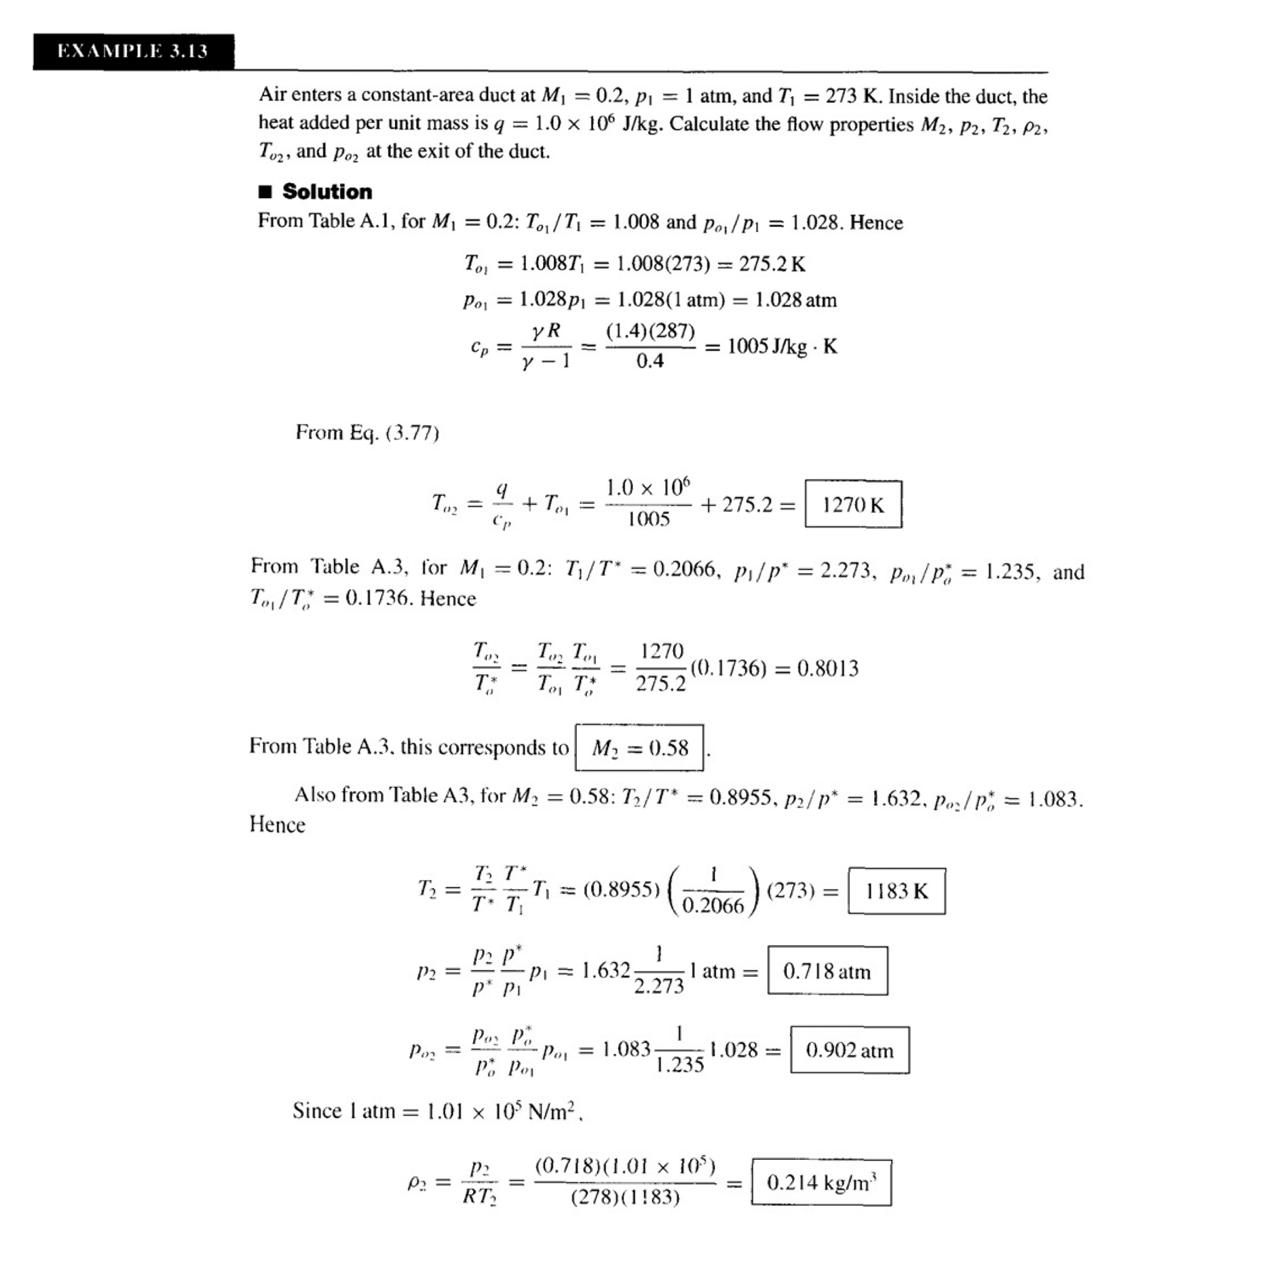

## Example 3.14

In [ ]:
M2, P2, T2, rho2, T_0_2, P_0_2 = rayleigh_solver(M1=3,T1=300,P1=1*101325,q=3e5)
print(f"Results:")
print(f"Mach number at station 2 (M2): {M2:.2f}")
print(f"Pressure at station 2 (P2): {P2/101325:.3f} atm")
print(f"Temperature at station 2 (T2): {T2:.3f} K")
print(f"Density at station 2 (rho2): {rho2:.3f} kg/m^3")
print(f"Total temperature at station 2 (T_0_2): {T_0_2:.3f} K")
print(f"Total pressure at station 2 (P_0_2): {P_0_2/101325:.3f} atm")

Results:
Mach number at station 2 (M2): 1.59
Pressure at station 2 (P2): 2.994 atm
Temperature at station 2 (T2): 756.040 K
Density at station 2 (rho2): 1.398 kg/m^3
Total temperature at station 2 (T_0_2): 1138.656 K
Total pressure at station 2 (P_0_2): 12.552 atm


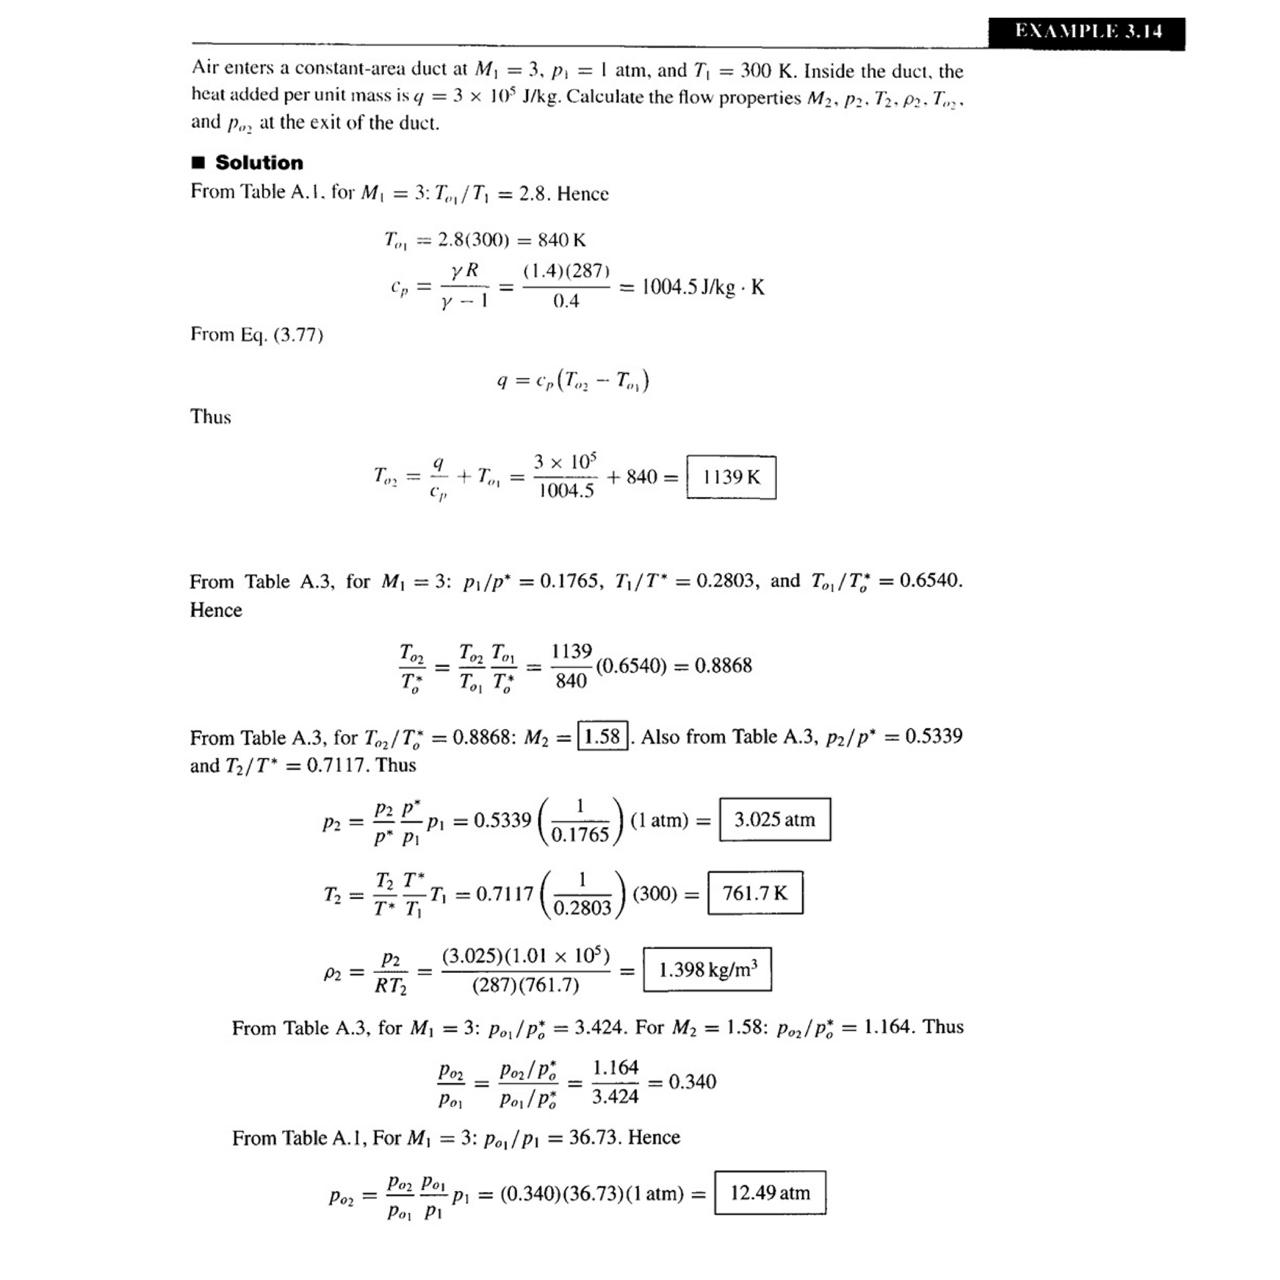

Validation of results:

The results obtained align closely with those presented in Modern Compressible Flow by J.D. Anderson. However, our results are more precise because the values in the book are derived from approximate data in gas tables, whereas we have directly coded and solved the equations to obtain exact values.

In [ ]:
# print("Please provide the following inputs:")
# M1 = float(input("Enter the initial Mach number: "))
# T1 = float(input("Enter the initial temperature (K): "))
# P1 = float(input("Enter the initial pressure (atm): "))
# q = float(input("Enter the heat added per unit mass (J/kg): "))

# M2, P2, T2, rho2, T_0_2, P_0_2 = rayleigh_solver(M1,T1,P1*101325,q)
# print(f"Results:")
# print(f"Mach number at station 2 (M2): {M2:.2f}")
# print(f"Pressure at station 2 (P2): {P2/101325:.3f} atm")
# print(f"Temperature at station 2 (T2): {T2:.3f} K")
# print(f"Density at station 2 (rho2): {rho2:.3f} kg/m^3")
# print(f"Total temperature at station 2 (T_0_2): {T_0_2:.3f} K")
# print(f"Total pressure at station 2 (P_0_2): {P_0_2/101325:.3f} atm")